<a href="https://colab.research.google.com/github/mizzony/ML-class/blob/main/A3_credit_score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A3: Credit Score Prediction using Machine Learning Models**

Sutinan Thanombun 230147

This assignment focuses on building, training, and evaluating machine learning models to
predict a customer’s credit score (Good, Poor, or Standard). Students will use train.csv for
model training and testing, while vald.csv will be used solely for validation to assess model
generalisation. The assignment involves tasks such as data cleaning, feature engineering,
model selection, hyperparameter tuning, and model comparison. At the end, students will
provide a comprehensive analysis and recommendations based on their findings.


##Executive Summary


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Necessary Libraries

In [2]:
# Install necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn xgboost tensorflow matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, classification_report)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 1.1 Interpretation
load the neccesary library for the analysis
include data exploratory, handling missing values, transform data such as replace missing values with other appropriate value such as mean, median or mode or remove some columns that irrilavant.

## 2. Load and Explore Datasets

In [3]:
# Load train and validation datasets
df = pd.read_csv('/content/drive/MyDrive/A3 creditscore/train.csv')
df_vald = pd.read_csv('/content/drive/MyDrive/A3 creditscore/vald.csv')

# Display the first few rows
print(df.head())
print(df.info())

      I_ID C_Customer_ID M_Month     N_Name A_Age        S_SSN O_Occupation  \
0   0x8663    CUS_0x4cf1    June      Rosss    36  356-73-0844       Writer   
1  0x21aa0    CUS_0x66f2   March  Brettellb    31  091-01-4447       Lawyer   
2  0x210ca    CUS_0x1aeb     May       Dane    19  256-19-0938      Teacher   
3   0x4816    CUS_0x2076     May        NaN    26  486-13-8771      Manager   
4  0x25f94    CUS_0xad4f   March        NaN    47  226-45-0652    Developer   

  A_Annual_Income  M_Monthly_Inhand_Salary  N_Num_Bank_Accounts  ...  \
0         7233.01               666.750833                   10  ...   
1     14944047.0_              6744.246667                   10  ...   
2        38253.64              2997.712061                    1  ...   
3        26281.03                      NaN                    8  ...   
4        22620.79              1722.065833                    7  ...   

   C_Credit_Mix  O_Outstanding_Debt C_Credit_Utilization_Ratio  \
0           Bad           

Understanding the dataset
1. train.csv
o Contains historical financial data of customers, including their credit scores
(target variable: C_Credit_Score).
o This dataset wis  used for both training and testing the models.
2. vald.csv
o Contains similar customer data but without the target variable.
o This dataset is used for model validation, assessing how well the trained
models generalise to new, unseen data

In [ ]:
print(df_vald.head())

      I_ID C_Customer_ID    M_Month           N_Name A_Age        S_SSN  \
0  0x16c61    CUS_0x9a55   December           Kathyy    43  371-02-6134   
1  0x1bec6    CUS_0x2e8d  September              NaN    32  026-76-5731   
2  0x221c6    CUS_0xc1ec  September  Jennifer Ablanj    15  089-08-2627   
3  0x20cae    CUS_0xb40d  September            Shaor    19  886-87-2102   
4   0xbc44    CUS_0x9466   November        Jenniferf    50  168-77-9086   

   O_Occupation A_Annual_Income  M_Monthly_Inhand_Salary  N_Num_Bank_Accounts  \
0     Scientist         7296.72               840.060000                    8   
1       Manager        57396.72              5074.060000                    3   
2  Entrepreneur        40976.22              3473.685000                    5   
3     Architect        15509.99              1364.499167                    6   
4        Doctor        61269.16              5295.763333                    6   

   ...  N_Num_Credit_Inquiries  C_Credit_Mix O_Outstanding_Deb

In [ ]:
# get  all the columns names
df.columns

Index(['I_ID', 'C_Customer_ID', 'M_Month', 'N_Name', 'A_Age', 'S_SSN',
       'O_Occupation', 'A_Annual_Income', 'M_Monthly_Inhand_Salary',
       'N_Num_Bank_Accounts', 'N_Num_Credit_Card', 'I_Interest_Rate',
       'N_Num_of_Loan', 'T_Type_of_Loan', 'D_Delay_from_due_date',
       'N_Num_of_Delayed_Payment', 'C_Changed_Credit_Limit',
       'N_Num_Credit_Inquiries', 'C_Credit_Mix', 'O_Outstanding_Debt',
       'C_Credit_Utilization_Ratio', 'C_Credit_History_Age',
       'P_Payment_of_Min_Amount', 'T_Total_EMI_per_month',
       'A_Amount_invested_monthly', 'P_Payment_Behaviour', 'M_Monthly_Balance',
       'C_Credit_Score'],
      dtype='object')

In [ ]:
# Check for missing values for train
print(df.isnull().sum().sort_values(ascending=False))

M_Monthly_Inhand_Salary       12021
T_Type_of_Loan                 9130
N_Name                         8017
C_Credit_History_Age           7231
N_Num_of_Delayed_Payment       5598
A_Amount_invested_monthly      3580
N_Num_Credit_Inquiries         1572
M_Monthly_Balance               956
M_Month                           0
A_Age                             0
C_Customer_ID                     0
I_ID                              0
I_Interest_Rate                   0
N_Num_Credit_Card                 0
N_Num_Bank_Accounts               0
A_Annual_Income                   0
S_SSN                             0
O_Occupation                      0
D_Delay_from_due_date             0
N_Num_of_Loan                     0
O_Outstanding_Debt                0
C_Credit_Mix                      0
C_Changed_Credit_Limit            0
C_Credit_Utilization_Ratio        0
T_Total_EMI_per_month             0
P_Payment_of_Min_Amount           0
P_Payment_Behaviour               0
C_Credit_Score              

Visualize the distribution and explore the quartile of each columns in the dataset

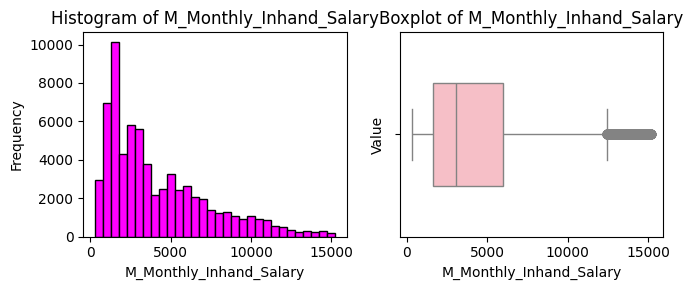

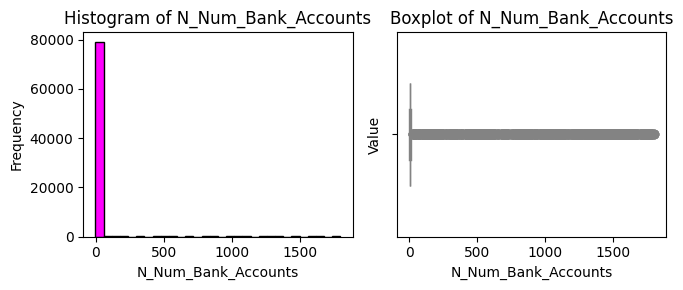

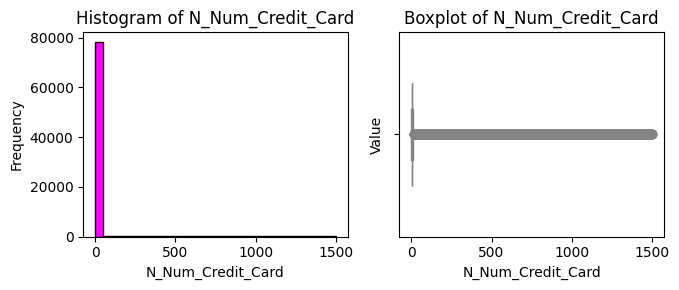

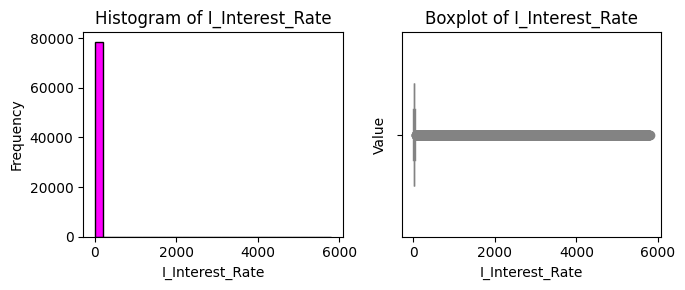

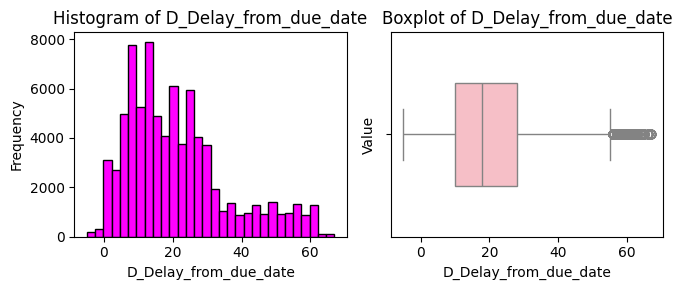

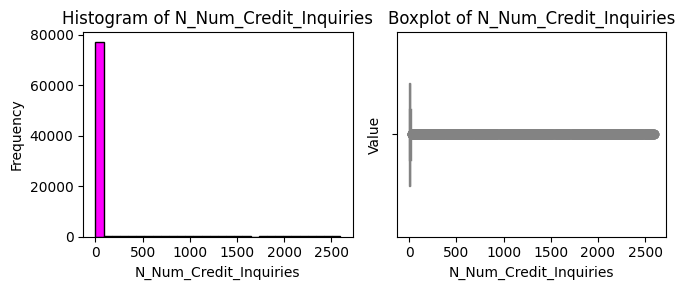

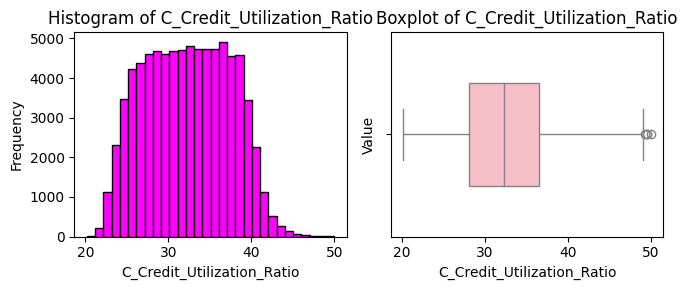

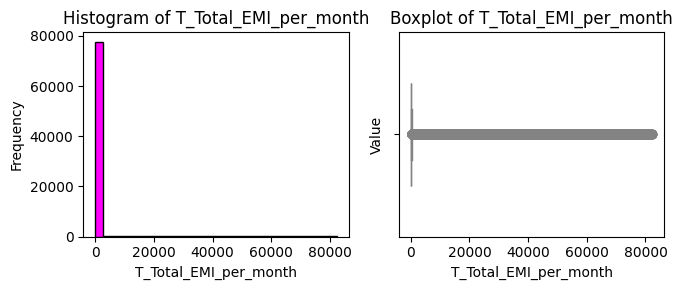

In [ ]:
#Histogram for Visualize the distribution of column values, Boxplot for see percentiles and detect outliers
num_cols = df.select_dtypes(include=np.number).columns
numerical_data = df[num_cols]
for col in numerical_data[1:]:
    plt.figure(figsize=(10, 3))

     # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[col],color='lightpink', width=0.5)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')

    # Histogram
    plt.subplot(1, 3, 1)
    df[col].plot.hist(bins=30, color='magenta', edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')

    plt.tight_layout()
    plt.show()

Explore the differences of each occupation, credit score  and average annual income using crosstab from pandas.

In [ ]:
# Convert 'A_Annual_Income' to numeric before calculating the mean
df['A_Annual_Income'] = pd.to_numeric(df['A_Annual_Income'], errors='coerce')

# Calculate the crosstab with the numeric column
cross_tab = pd.crosstab(df['C_Credit_Score'], df['O_Occupation'],
                        values=df['A_Annual_Income'], aggfunc='mean')

# Round the results to 2 decimal places
cross_tab = cross_tab.round(2)

# Apply styling to highlight max and min values in each row
styled_cross_tab = cross_tab.style.apply(lambda x: [
    'background-color: green' if v == x.max() else
    'background-color: red' if v == x.min() else '' for v in x
], axis=1)

styled_cross_tab


O_Occupation,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,Musician,Scientist,Teacher,Writer,_______
C_Credit_Score,,,,,,,,,,,,,,,,
Good,119050.960000,195740.700000,214462.050000,183620.460000,186628.290000,221242.250000,166222.140000,212927.060000,116650.410000,216415.850000,148048.690000,219764.130000,254274.790000,107048.780000,165864.920000,230976.940000
Poor,124825.280000,149630.100000,181334.790000,77005.440000,164919.060000,136356.350000,119128.990000,173606.460000,173940.250000,84078.840000,118763.070000,171999.070000,166576.120000,159105.300000,126837.270000,187558.860000
Standard,229181.450000,179457.670000,165453.530000,244256.400000,143418.740000,207090.030000,203671.460000,174419.130000,135045.740000,193256.970000,229669.500000,192608.910000,160715.120000,165826.760000,203020.740000,173048.430000


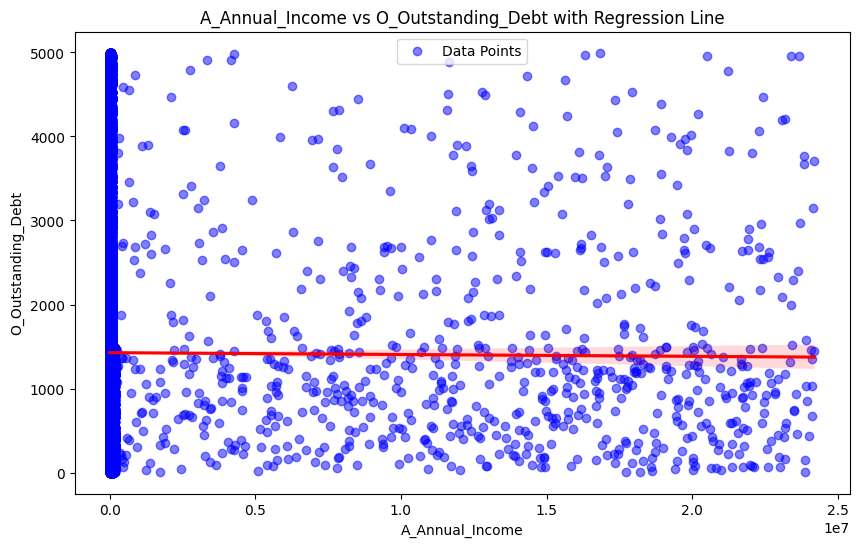

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a combined scatter plot with a regression line
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['A_Annual_Income'], df['O_Outstanding_Debt'], label='Data Points', color='blue', alpha=0.5)

# Regression line
sns.regplot(x='A_Annual_Income', y='O_Outstanding_Debt', data=df, scatter=False, color='red', line_kws={'label': 'Regression Line'})

# Adding titles and labels
plt.title('A_Annual_Income vs O_Outstanding_Debt with Regression Line')
plt.xlabel("A_Annual_Income")
plt.ylabel("O_Outstanding_Debt")
plt.legend()

# Display the combined plot
plt.show()

##Data Cleaning and Handling missing Value


In [4]:
#convert credit history object to number
import pandas as pd
data = df['C_Credit_History_Age']

# Function to convert 'Years and Months' format to total months
def convert_to_months(value):
    if pd.isnull(value):
        return None  # Handle missing values
    parts = value.split()  # Split the text by spaces
    years = int(parts[0])  # Extract years
    months = int(parts[3])  # Extract months
    total_months = years * 12 + months  # Convert years to months and add remaining months
    return total_months

# Apply the conversion function to the 'C_Credit_History_Age' column
df['C_Credit_History_Age_in_Months'] = df['C_Credit_History_Age'].apply(convert_to_months)

# Display the updated DataFrame
print(df[['C_Credit_History_Age', 'C_Credit_History_Age_in_Months']])


         C_Credit_History_Age  C_Credit_History_Age_in_Months
0       8 Years and 10 Months                           106.0
1       11 Years and 1 Months                           133.0
2       21 Years and 3 Months                           255.0
3       16 Years and 2 Months                           194.0
4       29 Years and 5 Months                           353.0
...                       ...                             ...
79995    3 Years and 9 Months                            45.0
79996  30 Years and 11 Months                           371.0
79997   22 Years and 2 Months                           266.0
79998   18 Years and 2 Months                           218.0
79999   25 Years and 7 Months                           307.0

[80000 rows x 2 columns]


In [5]:
#drop original C_Credit_History_Age
df = df.drop(columns=['C_Credit_History_Age'])
df.head()

,I_ID,C_Customer_ID,M_Month,N_Name,A_Age,S_SSN,O_Occupation,A_Annual_Income,M_Monthly_Inhand_Salary,N_Num_Bank_Accounts,...,C_Credit_Mix,O_Outstanding_Debt,C_Credit_Utilization_Ratio,P_Payment_of_Min_Amount,T_Total_EMI_per_month,A_Amount_invested_monthly,P_Payment_Behaviour,M_Monthly_Balance,C_Credit_Score,C_Credit_History_Age_in_Months
0,0x8663,CUS_0x4cf1,June,Rosss,36,356-73-0844,Writer,7233.01,666.750833,10,...,Bad,2179.32,36.392729,Yes,18.659902,65.9355626164235,Low_spent_Small_value_payments,272.0796182561402,Poor,106.0
1,0x21aa0,CUS_0x66f2,March,Brettellb,31,091-01-4447,Lawyer,14944047.0_,6744.246667,10,...,Bad,2624.85,34.573171,Yes,326.167190,62.850219055810975,High_spent_Large_value_payments,525.4072579342993,Standard,133.0
2,0x210ca,CUS_0x1aeb,May,Dane,19,256-19-0938,Teacher,38253.64,2997.712061,1,...,Good,843.89,35.522714,No,395.782037,117.35404319325434,High_spent_Small_value_payments,420.735525384108,Good,255.0
3,0x4816,CUS_0x2076,May,NaN,26,486-13-8771,Manager,26281.03,NaN,8,...,Standard,267.49,24.303701,NM,46.426162,157.76771721619787,High_spent_Small_value_payments,299.81470450974166,Standard,194.0
4,0x25f94,CUS_0xad4f,March,NaN,47,226-45-0652,Developer,22620.79,1722.065833,7,...,_,642.46,26.622486,No,0.000000,29.108504721502552,High_spent_Large_value_payments,383.0980786118308,Standard,353.0


In [6]:
#replace missing value in C_Credit_History_Age_in_Months with means
df['C_Credit_History_Age_in_Months'].fillna(df['C_Credit_History_Age_in_Months'].mean(), inplace=True)
print(df.isnull().sum().sort_values(ascending=False))

<ipython-input-6-5ecee30857f8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['C_Credit_History_Age_in_Months'].fillna(df['C_Credit_History_Age_in_Months'].mean(), inplace=True)


M_Monthly_Inhand_Salary           12021
T_Type_of_Loan                     9130
N_Name                             8017
N_Num_of_Delayed_Payment           5598
A_Amount_invested_monthly          3580
N_Num_Credit_Inquiries             1572
M_Monthly_Balance                   956
O_Occupation                          0
M_Month                               0
A_Age                                 0
C_Customer_ID                         0
I_ID                                  0
I_Interest_Rate                       0
N_Num_Credit_Card                     0
N_Num_Bank_Accounts                   0
A_Annual_Income                       0
S_SSN                                 0
C_Changed_Credit_Limit                0
D_Delay_from_due_date                 0
N_Num_of_Loan                         0
O_Outstanding_Debt                    0
C_Credit_Mix                          0
P_Payment_of_Min_Amount               0
C_Credit_Utilization_Ratio            0
T_Total_EMI_per_month                 0


Impute some columns using SimpleImputer form sklearn.(Impute also known as transformer)
mostly use mean for numeric data, Mode for categorical data

In [7]:
#turn object to numeric
for col in ['N_Num_of_Delayed_Payment', 'A_Amount_invested_monthly', 'M_Monthly_Balance', 'A_Age','A_Annual_Income', 'M_Monthly_Inhand_Salary', 'N_Num_Credit_Inquiries', 'O_Outstanding_Debt']: # Include the problematic columns
    # Check if the column is of object type before applying string operations
    if df[col].dtype == 'object':
        # Remove any leading/trailing spaces and replace underscores with empty strings
        df[col] = df[col].str.strip().str.replace('_', '', regex=False)
    # Use errors='coerce' to handle out-of-range values as NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for NaN values after conversion (indicating errors) and print them if any
    nan_values = df[col][df[col].isnull()]
    if not nan_values.empty:
        print(f"Found NaN values in column '{col}' after conversion:\n{nan_values}")


#replace NaN with the median of the same colums
for col in ['N_Num_of_Delayed_Payment', 'A_Amount_invested_monthly', 'M_Monthly_Balance','A_Annual_Income', 'M_Monthly_Inhand_Salary', 'N_Num_Credit_Inquiries', 'O_Outstanding_Debt']: # Include the problematic columns
    df[col].fillna(df[col].median(), inplace=True)
df.head()

#replace NaN with the mean of the same colums
for col in ['A_Age']:
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

#then replace the last 2 high missing value with the median
from sklearn.impute import SimpleImputer

# Define the median imputer
median_imputer = SimpleImputer(strategy='median')

# Apply median imputer to the relevant columns
df[['M_Monthly_Inhand_Salary', 'N_Num_Credit_Inquiries', 'O_Outstanding_Debt']] = median_imputer.fit_transform(
    df[['M_Monthly_Inhand_Salary','N_Num_Credit_Inquiries','O_Outstanding_Debt']]
)


Found NaN values in column 'N_Num_of_Delayed_Payment' after conversion:
16      NaN
32      NaN
35      NaN
46      NaN
69      NaN
         ..
79898   NaN
79926   NaN
79934   NaN
79947   NaN
79986   NaN
Name: N_Num_of_Delayed_Payment, Length: 5598, dtype: float64
Found NaN values in column 'A_Amount_invested_monthly' after conversion:
23      NaN
27      NaN
31      NaN
49      NaN
138     NaN
         ..
79913   NaN
79951   NaN
79964   NaN
79965   NaN
79971   NaN
Name: A_Amount_invested_monthly, Length: 3580, dtype: float64
Found NaN values in column 'M_Monthly_Balance' after conversion:
98      NaN
218     NaN
248     NaN
272     NaN
330     NaN
         ..
79553   NaN
79561   NaN
79825   NaN
79866   NaN
79931   NaN
Name: M_Monthly_Balance, Length: 956, dtype: float64
Found NaN values in column 'M_Monthly_Inhand_Salary' after conversion:
3       NaN
21      NaN
31      NaN
37      NaN
41      NaN
         ..
79986   NaN
79994   NaN
79995   NaN
79996   NaN
79999   NaN
Name: M_Monthly

<ipython-input-7-f0bb18188a7c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-7-f0bb18188a7c>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
#how many NaN in the dataset third time
print(df.isnull().sum().sort_values(ascending=False))

T_Type_of_Loan                    9130
N_Name                            8017
C_Customer_ID                        0
I_ID                                 0
A_Age                                0
S_SSN                                0
O_Occupation                         0
A_Annual_Income                      0
M_Monthly_Inhand_Salary              0
N_Num_Bank_Accounts                  0
N_Num_Credit_Card                    0
M_Month                              0
I_Interest_Rate                      0
N_Num_of_Loan                        0
D_Delay_from_due_date                0
N_Num_of_Delayed_Payment             0
C_Changed_Credit_Limit               0
N_Num_Credit_Inquiries               0
C_Credit_Mix                         0
O_Outstanding_Debt                   0
C_Credit_Utilization_Ratio           0
P_Payment_of_Min_Amount              0
T_Total_EMI_per_month                0
A_Amount_invested_monthly            0
P_Payment_Behaviour                  0
M_Monthly_Balance        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   I_ID                            80000 non-null  object 
 1   C_Customer_ID                   80000 non-null  object 
 2   M_Month                         80000 non-null  object 
 3   N_Name                          71983 non-null  object 
 4   A_Age                           80000 non-null  int64  
 5   S_SSN                           80000 non-null  object 
 6   O_Occupation                    80000 non-null  object 
 7   A_Annual_Income                 80000 non-null  float64
 8   M_Monthly_Inhand_Salary         80000 non-null  float64
 9   N_Num_Bank_Accounts             80000 non-null  int64  
 10  N_Num_Credit_Card               80000 non-null  int64  
 11  I_Interest_Rate                 80000 non-null  int64  
 12  N_Num_of_Loan                   

In [ ]:
# explore data summary transpose the matrix so its easier to see
summary = df.describe().T
round(summary, 2)

,count,mean,std,min,25%,50%,75%,max
A_Age,80000.0,1.110400e+02,6.877600e+02,-5.000000e+02,24.00,33.00,42.00,8698.00
A_Annual_Income,80000.0,1.730311e+05,1.409309e+06,7.005930e+03,19453.05,37501.21,72637.48,24188807.00
M_Monthly_Inhand_Salary,80000.0,4.019700e+03,2.950840e+03,3.036500e+02,1790.19,3085.85,5370.10,15204.63
N_Num_Bank_Accounts,80000.0,1.728000e+01,1.189900e+02,-1.000000e+00,3.00,6.00,7.00,1798.00
N_Num_Credit_Card,80000.0,2.259000e+01,1.295400e+02,0.000000e+00,4.00,5.00,7.00,1499.00
I_Interest_Rate,80000.0,7.224000e+01,4.655400e+02,1.000000e+00,8.00,13.00,20.00,5797.00
D_Delay_from_due_date,80000.0,2.110000e+01,1.488000e+01,-5.000000e+00,10.00,18.00,28.00,67.00
N_Num_of_Delayed_Payment,80000.0,2.987000e+01,2.193900e+02,-3.000000e+00,9.00,14.00,18.00,4397.00
N_Num_Credit_Inquiries,80000.0,2.724000e+01,1.903700e+02,0.000000e+00,3.00,6.00,9.00,2594.00
O_Outstanding_Debt,80000.0,1.426760e+03,1.155900e+03,2.300000e-01,565.33,1163.40,1950.21,4998.07


In [8]:
# some obvious problens with AGE column so Cleaning the Age column Calculate the median age for ages within the range of 18 to 100
median_age = df.loc[(df['A_Age'] >= 18) & (df['A_Age'] <= 90), 'A_Age'].median()

# Replace ages outside the range of 18 to 100 with the calculated median age
df['A_Age'] = df['A_Age'].apply(lambda x: median_age if x < 18 or x > 90 else x)

# Display the modified DataFrame to confirm changes
print(df[['A_Age']].describe())


              A_Age
count  80000.000000
mean      34.382525
std        9.681265
min       18.000000
25%       27.000000
50%       34.000000
75%       41.000000
max       56.000000


In [9]:
#using Z-score method to deal with outliers
import numpy as np

def remove_outliers_z_score(df, columns, threshold=3):
    for column in columns:
        # Calculate z-scores and filter rows within the threshold
        df = df[(np.abs((df[column] - df[column].median()) / df[column].std()) < threshold)]
    return df

# List of float columns to process for outlier removal
float_columns = [
    'A_Annual_Income', 'A_Age','M_Monthly_Inhand_Salary', 'N_Num_of_Delayed_Payment',
    'N_Num_Credit_Inquiries', 'C_Credit_Utilization_Ratio', 'T_Total_EMI_per_month',
    'A_Amount_invested_monthly', 'M_Monthly_Balance', 'C_Credit_History_Age_in_Months'
]

# Applying the function directly on the DataFrame `df`
df_no_outliers = remove_outliers_z_score(df, float_columns)

# Displaying the filtered DataFrame
print(df_no_outliers)


          I_ID C_Customer_ID  M_Month       N_Name  A_Age        S_SSN  \
0       0x8663    CUS_0x4cf1     June        Rosss   36.0  356-73-0844   
2      0x210ca    CUS_0x1aeb      May         Dane   19.0  256-19-0938   
3       0x4816    CUS_0x2076      May          NaN   26.0  486-13-8771   
4      0x25f94    CUS_0xad4f    March          NaN   47.0  226-45-0652   
5      0x1aa8a    CUS_0x4298  January         Yaov   45.0  850-03-7662   
...        ...           ...      ...          ...    ...          ...   
79995  0x248cf    CUS_0x96b4     June  Katie Reidu   34.0  574-43-0696   
79996  0x1d56e    CUS_0x6bc3  January   ill Trottx   23.0  266-04-7936   
79997   0xc0a7    CUS_0xb971     June       Davidv   49.0  644-26-7468   
79998   0x7f50    CUS_0x9647     July   Goncalvesc   37.0  954-95-9646   
79999   0x2fe5    CUS_0x3bb6    April      Baranij   39.0  763-62-0069   

        O_Occupation  A_Annual_Income  M_Monthly_Inhand_Salary  \
0             Writer          7233.01        

In [10]:
df = df_no_outliers #replace df with df_no_outliers

In [ ]:
#final look of the cleaned data
summary = df.describe().T
round(summary, 2)

,count,mean,std,min,25%,50%,75%,max
A_Age,71161.0,34.36,9.66,18.00,27.00,34.00,41.00,56.00
A_Annual_Income,71161.0,51185.04,105927.45,7005.93,19171.68,36064.74,69212.00,4265144.00
M_Monthly_Inhand_Salary,71161.0,3794.45,2601.82,303.65,1762.82,3085.85,5117.22,11929.91
N_Num_Bank_Accounts,71161.0,17.39,119.47,-1.00,4.00,6.00,8.00,1798.00
N_Num_Credit_Card,71161.0,22.72,129.91,0.00,4.00,6.00,7.00,1499.00
I_Interest_Rate,71161.0,72.96,468.95,1.00,8.00,14.00,21.00,5776.00
D_Delay_from_due_date,71161.0,21.35,14.92,-5.00,10.00,18.00,28.00,67.00
N_Num_of_Delayed_Payment,71161.0,13.80,12.74,-3.00,9.00,14.00,18.00,663.00
N_Num_Credit_Inquiries,71161.0,6.91,20.34,0.00,3.00,6.00,9.00,576.00
O_Outstanding_Debt,71161.0,1443.12,1162.75,0.23,573.65,1178.38,1983.53,4998.07


In [ ]:
df.info() #check data type again and number of row left again form 80000 to 71161

<class 'pandas.core.frame.DataFrame'>
Index: 71161 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   I_ID                            71161 non-null  object 
 1   C_Customer_ID                   71161 non-null  object 
 2   M_Month                         71161 non-null  object 
 3   N_Name                          64045 non-null  object 
 4   A_Age                           71161 non-null  float64
 5   S_SSN                           71161 non-null  object 
 6   O_Occupation                    71161 non-null  object 
 7   A_Annual_Income                 71161 non-null  float64
 8   M_Monthly_Inhand_Salary         71161 non-null  float64
 9   N_Num_Bank_Accounts             71161 non-null  int64  
 10  N_Num_Credit_Card               71161 non-null  int64  
 11  I_Interest_Rate                 71161 non-null  int64  
 12  N_Num_of_Loan                   71161

In [11]:
#drop 4 columns with High Missingness and irrelavant
df = df.drop(columns=['N_Name', 'T_Type_of_Loan','I_ID','C_Customer_ID','S_SSN'	])
df.head()

,M_Month,A_Age,O_Occupation,A_Annual_Income,M_Monthly_Inhand_Salary,N_Num_Bank_Accounts,N_Num_Credit_Card,I_Interest_Rate,N_Num_of_Loan,D_Delay_from_due_date,...,C_Credit_Mix,O_Outstanding_Debt,C_Credit_Utilization_Ratio,P_Payment_of_Min_Amount,T_Total_EMI_per_month,A_Amount_invested_monthly,P_Payment_Behaviour,M_Monthly_Balance,C_Credit_Score,C_Credit_History_Age_in_Months
0,June,36.0,Writer,7233.01,666.750833,10,8,30,5,19,...,Bad,2179.32,36.392729,Yes,18.659902,65.935563,Low_spent_Small_value_payments,272.079618,Poor,106.0
2,May,19.0,Teacher,38253.64,2997.712061,1,3,2,3,7,...,Good,843.89,35.522714,No,395.782037,117.354043,High_spent_Small_value_payments,420.735525,Good,255.0
3,May,26.0,Manager,26281.03,3085.853333,8,3,16,3,30,...,Standard,267.49,24.303701,NM,46.426162,157.767717,High_spent_Small_value_payments,299.814705,Standard,194.0
4,March,47.0,Developer,22620.79,1722.065833,7,3,9,0,27,...,_,642.46,26.622486,No,0.000000,29.108505,High_spent_Large_value_payments,383.098079,Standard,353.0
5,January,45.0,Teacher,49963.65,4456.637500,8,9,19,3,59,...,Bad,1624.60,37.185541,Yes,99.887064,59.674816,High_spent_Medium_value_payments,536.101870,Poor,73.0


### 2.1 Interpretation

## 3. EDA (Exploratory Data Analysis)

In [ ]:
import plotly.express as px  # Import plotly.express and assign

#explore relationship of age distribution and predictor
fig = px.histogram(df, x='A_Age', color='C_Credit_Score', barmode='group', nbins=20, title='Credit score by Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Count')
fig.show()

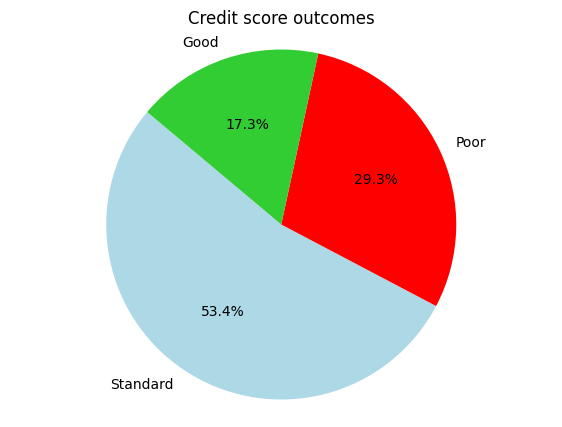

In [ ]:
#explore credit score outcomes
Outcome_counts = df['C_Credit_Score'].value_counts()

plt.figure(figsize=(7, 5))
plt.pie(Outcome_counts, labels=Outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red','limegreen'])
plt.title('Credit score outcomes')
plt.axis('equal')
plt.show()

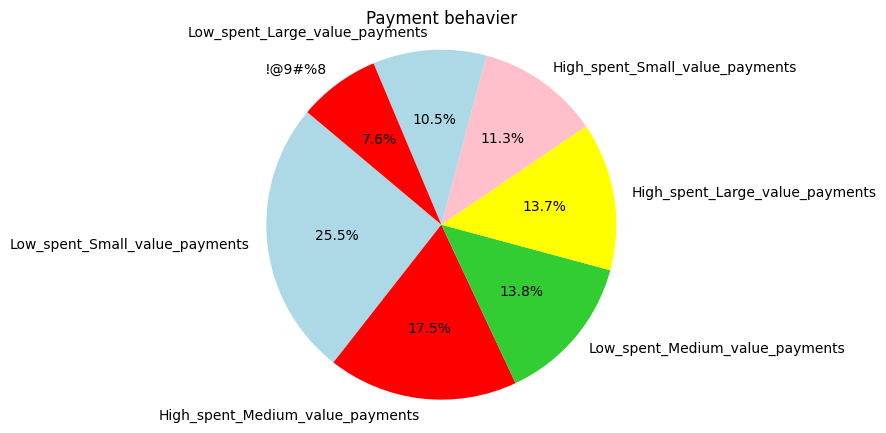

In [ ]:

#Payment_Behaviour_counts = df['P_Payment_Behaviour'].value_counts()
plt.figure(figsize=(7, 5))
plt.pie(Payment_Behaviour_counts, labels=Payment_Behaviour_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'red','limegreen','yellow','pink'])
plt.title('Payment behavier')
plt.axis('equal')
plt.show()



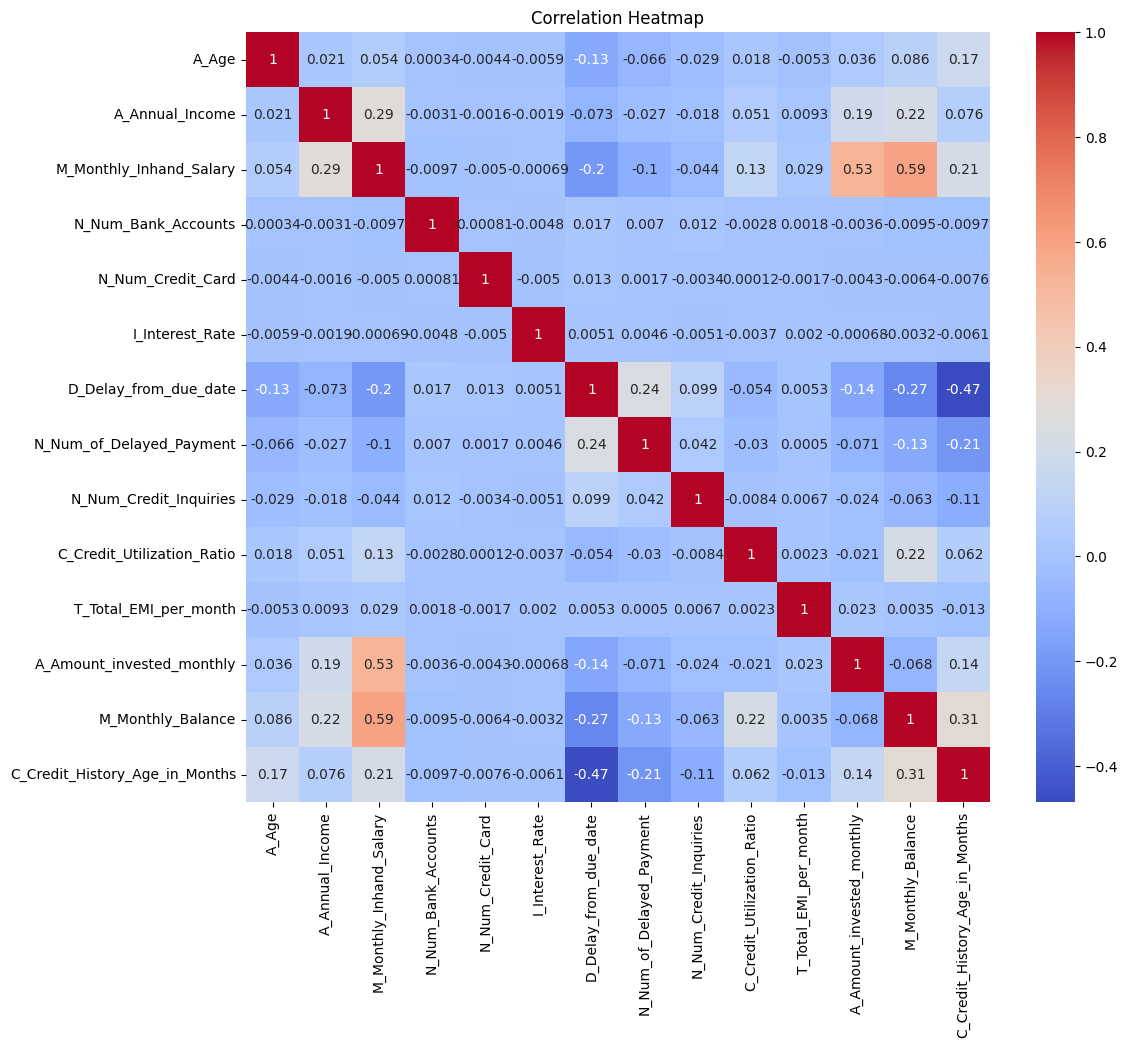

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select only numerical features for correlation calculation
numerical_features = df.select_dtypes(include=np.number).columns
numerical_df = df[numerical_features]

# Heatmap to show correlations for numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



**Interpretation:** According to the correlation matrix. We can see that M_Monthly_Balance have quite positive correlation with M_Monthly_Inhand_Salary same with A_Amount_Invested_Monthly with all have positive correlation.

and We can see the Credit_history age in months have negative correlation with Number of Delay payment.

### 3.1 Interpretation
After we see the correlation matrix we dig deeper into this 2 columns to see their indept relationship. As the scatter plot above.

##  Feature Engineering

In [12]:
# Feature Engineering: Create Debt-to-Income Ratio
df['Debt_to_Income_Ratio'] = df['O_Outstanding_Debt'].astype(str).str.replace('_', '').astype(float) / df['A_Annual_Income'].astype(str).str.replace('_', '').astype(float)
df.head()

,M_Month,A_Age,O_Occupation,A_Annual_Income,M_Monthly_Inhand_Salary,N_Num_Bank_Accounts,N_Num_Credit_Card,I_Interest_Rate,N_Num_of_Loan,D_Delay_from_due_date,...,O_Outstanding_Debt,C_Credit_Utilization_Ratio,P_Payment_of_Min_Amount,T_Total_EMI_per_month,A_Amount_invested_monthly,P_Payment_Behaviour,M_Monthly_Balance,C_Credit_Score,C_Credit_History_Age_in_Months,Debt_to_Income_Ratio
0,June,36.0,Writer,7233.01,666.750833,10,8,30,5,19,...,2179.32,36.392729,Yes,18.659902,65.935563,Low_spent_Small_value_payments,272.079618,Poor,106.0,0.301302
2,May,19.0,Teacher,38253.64,2997.712061,1,3,2,3,7,...,843.89,35.522714,No,395.782037,117.354043,High_spent_Small_value_payments,420.735525,Good,255.0,0.022060
3,May,26.0,Manager,26281.03,3085.853333,8,3,16,3,30,...,267.49,24.303701,NM,46.426162,157.767717,High_spent_Small_value_payments,299.814705,Standard,194.0,0.010178
4,March,47.0,Developer,22620.79,1722.065833,7,3,9,0,27,...,642.46,26.622486,No,0.000000,29.108505,High_spent_Large_value_payments,383.098079,Standard,353.0,0.028401
5,January,45.0,Teacher,49963.65,4456.637500,8,9,19,3,59,...,1624.60,37.185541,Yes,99.887064,59.674816,High_spent_Medium_value_payments,536.101870,Poor,73.0,0.032516


In [16]:
# One-Hot Encoding of categorical variables
categorical_columns = [
     'M_Month', 'O_Occupation', 'N_Num_of_Loan',
    'C_Changed_Credit_Limit', 'C_Credit_Mix', 'P_Payment_of_Min_Amount',
    'P_Payment_Behaviour'
]

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop rows with missing values
df_encoded.dropna(inplace=True)

# Define features (X) and target (y)
X = df_encoded.drop(columns=['C_Credit_Score'])

# Check encoded target column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['C_Credit_Score_encoded'] = label_encoder.fit_transform(df['C_Credit_Score'])
print(df[['C_Credit_Score', 'C_Credit_Score_encoded']])

y = df['C_Credit_Score_encoded']

      C_Credit_Score  C_Credit_Score_encoded
0               Poor                       1
2               Good                       0
3           Standard                       2
4           Standard                       2
5               Poor                       1
...              ...                     ...
79995           Poor                       1
79996       Standard                       2
79997       Standard                       2
79998           Poor                       1
79999           Poor                       1

[71161 rows x 2 columns]


In [17]:
y.head()

,C_Credit_Score_encoded
0,1
2,0
3,2
4,2
5,1


In [18]:
# Replace any remaining underscores within the entire DataFrame X before conversion
X = X.replace('_', '', regex=True)  # Replaces all underscores in all columns
X = X.astype(float).astype(int)
X.head()

,A_Age,A_Annual_Income,M_Monthly_Inhand_Salary,N_Num_Bank_Accounts,N_Num_Credit_Card,I_Interest_Rate,D_Delay_from_due_date,N_Num_of_Delayed_Payment,N_Num_Credit_Inquiries,O_Outstanding_Debt,...,C_Credit_Mix_Standard,C_Credit_Mix__,P_Payment_of_Min_Amount_No,P_Payment_of_Min_Amount_Yes,P_Payment_Behaviour_High_spent_Large_value_payments,P_Payment_Behaviour_High_spent_Medium_value_payments,P_Payment_Behaviour_High_spent_Small_value_payments,P_Payment_Behaviour_Low_spent_Large_value_payments,P_Payment_Behaviour_Low_spent_Medium_value_payments,P_Payment_Behaviour_Low_spent_Small_value_payments
0,36,7233,666,10,8,30,19,19,10,2179,...,0,0,0,1,0,0,0,0,0,1
2,19,38253,2997,1,3,2,7,3,1,843,...,0,0,1,0,0,0,1,0,0,0
3,26,26281,3085,8,3,16,30,18,7,267,...,1,0,0,0,0,0,1,0,0,0
4,47,22620,1722,7,3,9,27,18,2,642,...,0,1,1,0,1,0,0,0,0,0
5,45,49963,4456,8,9,19,59,25,7,1624,...,0,0,0,1,0,1,0,0,0,0


### 4.1 Interpretation

## 5. Train-Test Split

In [19]:
# Split train.csv into training and testing sets (80/20 split)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

#Scaling important for logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train shape: (56928, 4531)
X_test shape: (14233, 4531)
y_train shape: (56928,)
y_test shape: (14233,)


### 5.1 Interpretation

- StandardScaler has been applied to normalize the features, ensuring consistency and improving model performance.

## 6. Model Training and Testing

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

# Placeholder to store model performance results
results = {}

# Logistic Regression (already defined in your code)
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
results['Logistic Regression'] = {
    'Classification Report': classification_report(y_test, y_pred_lr),
    'AUC-ROC': roc_auc_score(y_test, lr_model.predict_proba(X_test), multi_class='ovr'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_lr),
    'Accuracy': accuracy_score(y_test, y_pred_lr)
}

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
results['Decision Tree'] = {
    'Classification Report': classification_report(y_test, y_pred_dt),
    'AUC-ROC': roc_auc_score(y_test, dt_model.predict_proba(X_test), multi_class='ovr'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_dt),
    'Accuracy': accuracy_score(y_test, y_pred_dt)
}

# Random Forest
rf_model = RandomForestClassifier(random_state=0, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results['Random Forest'] = {
    'Classification Report': classification_report(y_test, y_pred_rf),
    'AUC-ROC': roc_auc_score(y_test, rf_model.predict_proba(X_test), multi_class='ovr'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_rf),
    'Accuracy': accuracy_score(y_test, y_pred_rf)
}

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results['XGBoost'] = {
    'Classification Report': classification_report(y_test, y_pred_xgb),
    'AUC-ROC': roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb)
}

# Artificial Neural Network (ANN)
ann_model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=200, random_state=0)
ann_model.fit(X_train, y_train)
y_pred_ann = ann_model.predict(X_test)
results['ANN'] = {
    'Classification Report': classification_report(y_test, y_pred_ann),
    'AUC-ROC': roc_auc_score(y_test, ann_model.predict_proba(X_test), multi_class='ovr'),
    'Confusion Matrix': confusion_matrix(y_test, y_pred_ann),
    'Accuracy': accuracy_score(y_test, y_pred_ann)
}

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(metrics['Classification Report'])
    print("AUC-ROC:", metrics['AUC-ROC'])
    print("Confusion Matrix:\n", metrics['Confusion Matrix'])
    print("Accuracy:", metrics['Accuracy'])
    print("\n" + "="*50 + "\n")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:29:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2530
           1       1.00      0.97      0.98      4213
           2       1.00      1.00      1.00      7490

    accuracy                           0.99     14233
   macro avg       0.98      0.99      0.99     14233
weighted avg       0.99      0.99      0.99     14233

AUC-ROC: 0.9990308334925008
Confusion Matrix:
 [[2525    5    0]
 [ 127 4086    0]
 [   0    7 7483]]
Accuracy: 0.9902339633246681


Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2530
           1       1.00      1.00      1.00      4213
           2       1.00      1.00      1.00      7490

    accuracy                           1.00     14233
   macro avg       1.00      1.00      1.00     14233
weighted avg       1.00      1.00      1.00     14233

AUC-ROC: 1.0
Confusion Matrix:
 [[2530    0    0]
 [   0 

In [ ]:
#perform hyperparameter tuning for each model using GridsearchCV
from sklearn.model_selection import GridSearchCV

# Placeholder to store best models and their scores
best_models = {}

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'max_iter': [100, 200, 300],
        'C': [0.01, 0.1, 1, 10]
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'ANN': {
        'hidden_layer_sizes': [(64, 64), (128, 64), (64, 32)],
        'max_iter': [200, 300],
        'alpha': [0.0001, 0.001, 0.01]
    }
}

# Logistic Regression
lr_model = LogisticRegression()
grid_lr = GridSearchCV(lr_model, param_grids['Logistic Regression'], scoring='accuracy', cv=5)
grid_lr.fit(X_train, y_train)
best_models['Logistic Regression'] = grid_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_lr.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_lr.best_score_)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
grid_dt = GridSearchCV(dt_model, param_grids['Decision Tree'], scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)
best_models['Decision Tree'] = grid_dt.best_estimator_
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_dt.best_score_)

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
grid_rf = GridSearchCV(rf_model, param_grids['Random Forest'], scoring='accuracy', cv=5)
grid_rf.fit(X_train, y_train)
best_models['Random Forest'] = grid_rf.best_estimator_
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_rf.best_score_)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
grid_xgb = GridSearchCV(xgb_model, param_grids['XGBoost'], scoring='accuracy', cv=5)
grid_xgb.fit(X_train, y_train)
best_models['XGBoost'] = grid_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best cross-validation score for XGBoost:", grid_xgb.best_score_)

# ANN
ann_model = MLPClassifier(random_state=0)
grid_ann = GridSearchCV(ann_model, param_grids['ANN'], scoring='accuracy', cv=5)
grid_ann.fit(X_train, y_train)
best_models['ANN'] = grid_ann.best_estimator_
print("Best parameters for ANN:", grid_ann.best_params_)
print("Best cross-validation score for ANN:", grid_ann.best_score_)


In [ ]:
# Predict on test data by evaluate each best-tuned model on the test set (X_test) from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# create empty dictionary to store evaluation results
evaluation_results = {}

# Evaluate each model
for model_name, model in best_models.items():
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # AUC-ROC (use 'ovr' for multi-class)
    try:
        auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    except ValueError:
        auc_roc = 'Not Applicable (binary/NaN)'

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # Store results
    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'AUC-ROC': auc_roc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Print results
    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("AUC-ROC:", auc_roc)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    print("\n" + "="*50 + "\n")

# Optional: Summarize results in a table format for comparison
import pandas as pd

# Extract and display accuracy and AUC-ROC for easy comparison
summary_df = pd.DataFrame({
    model_name: {
        'Accuracy': eval_data['Accuracy'],
        'AUC-ROC': eval_data['AUC-ROC']
    } for model_name, eval_data in evaluation_results.items()
}).T

print("Model Comparison Summary:")
print(summary_df)


### 6.1 Interpretation

## 7. Validation on vald.csv

In [ ]:
# Use the trained model to generate predictions on vald.csv (without labels)
vald_predictions = lr_model.predict(vald)
print("Predictions on vald.csv:", vald_predictions[:10])

### 7.1 Interpretation

using cross validation a crucial technique in machine learning and statistical modeling for several reasons, especially when you want to evaluate the performance of your model on unseen data. Here are the key reasons why cross-validation is important:

## 8. Model Comparison Table

In [ ]:
# Example of a model comparison table
results = pd.DataFrame({
    'Model': ['Logistic Regression'],
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'Precision': [precision_score(y_test, y_pred, average='weighted')],
    'Recall': [recall_score(y_test, y_pred, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred, average='weighted')]
})
print(results)


### 8.1 Interpretation

## 9. Conclusion and Recommendations
This section should provide a comprehensive summary of the project’s overall results. Detailed interpretations of the model performances should be included, highlighting which model performed the best and explaining the reasons based on key metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. Important insights from the feature analysis, such as which variables had the strongest influence on credit score predictions, should also be discussed.

Recommendations should focus on ways to enhance model performance, such as through additional hyperparameter tuning, feature engineering, or testing other algorithms. Suggestions on how customers can improve their credit scores, based on the findings (e.g., lowering debt or avoiding delayed payments), should also be included. Consider proposing potential future improvements, like exploring new features or integrating more data, to increase the models' accuracy and robustness.

Ensure that the section ties together the key outcomes of the project and reflects on the lessons learned throughout the process.


Classifying customers based on their credit scores helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. A person with a good credit score will get loans from any bank and financial institution.


In [ ]:
#fix imbalance data problems because it may leads to inaccuracy or errors
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
print("Before Smoote" , y_train.value_counts())

X_train, y_train = smote.fit_resample(X_train, y_train)

print("\n After Smoote" , y_train.value_counts())

In [ ]:
#try with different algorithom like XGboost and Decision Tree

# Convert to DataFrame
df1 = pd.DataFrame(df)

# Define the independent variables (X) and the dependent variable (y)
X = df.drop(columns=['default.payment.next.month','BILL_AMT3','BILL_AMT5','BILL_AMT4','BILL_AMT6','EDUCATION_1','EDUCATION_2','EDUCATION_3','EDUCATION_4','EDUCATION_5','EDUCATION_6'])
y = df['default.payment.next.month']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Results")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print("\nXGBoost Results")
print(f"Accuracy: {accuracy_xgb}")
print("Confusion Matrix:\n", conf_matrix_xgb)
print("Classification Report:\n", class_report_xgb)


After applying gridsearch Cross validation (CV).Best XGBoost Model Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50} Accuracy: 0.8206666666666667 with F1 [0] score = 0.84

Best Decision Tree Model Best Parameters: {'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2} Accuracy: 0.8213333333333334 F1=0.89

In summary, The model that can describe the UCI credit score after apply Gridsearch CV is Decesion tree with these Metrics performace:

Accuracy: 0.8213 (82.13%), indicating that the model correctly classifies about 82% of the test samples. F1 Score: 0.89, showing a strong balance between precision and recall, which is particularly beneficial if the dataset is imbalanced.